# Text Analysis of Amazon Grocery_and_Gourmet_Food Product Reviews.

###### Name : Manimadhuri Edara
###### GitHub profile: https://github.com/MANIMADHURIE
###### LinkedIn progile: https://www.linkedin.com/in/manimadhuriedara/

The Amazon Grocery_and_Gourmet_Food Reviews dataset consists of reviews of Grocery_and_Gourmet foods from Amazon. The data span a period of more than 10 years, including all ~500,000 reviews. Reviews include product and user information, ratings, and a plaintext review.

<img src="https://assets.aboutamazon.com/dims4/default/e1f08b0/2147483647/strip/true/crop/1279x720+0+0/resize/1320x743!/format/webp/quality/90/?url=https%3A%2F%2Famazon-blogs-brightspot.s3.amazonaws.com%2Ff5%2F9f%2F43fe106c4a5081e7a696ef0a8fa8%2Ffresh-1280x7201.jpg" width="400">

##### Source of the Dataset : https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

##### Necessary frameworks

In [ ]:
pip install pywedge


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd  # Data manipulation and analysis
import pywedge as pw
import numpy as np  # Numerical computing
import matplotlib.pyplot as plt  # Data visualization
import plotly.express as px
import seaborn as sns  # Enhanced data visualization
from tabulate import tabulate  # Tabular data formatting
import os  # Operating system utilities
import nltk  # Natural Language Toolkit for text processing
import re  # Regular expressions for text manipulation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization
from sklearn.preprocessing import StandardScaler  # Data scaling
from tqdm import tqdm  # Progress bars
from sklearn.manifold import TSNE  # Dimensionality reduction
from imblearn.over_sampling import RandomOverSampler, SMOTE  # Imbalanced data handling
from sklearn.metrics import accuracy_score, f1_score, classification_report  # Evaluation metrics
from sklearn.model_selection import cross_val_score  # Cross-validation
from sklearn.metrics import confusion_matrix  # Confusion matrix
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.decomposition import TruncatedSVD, PCA  # Dimensionality reduction techniques
from transformers import BertTokenizer, AutoTokenizer  # Transformers for NLP
nltk.download('all')
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

*italicized text*## **Data Cleaning & Analysis**

In [ ]:
def explore_dataset(data, data_filename=None):
    """
    We learn every detail listed below in the explore_dataset method:
    - Shape of dataset
    - Column names that exist in dataset
    - checking for Missing values
    - Overall information about dataset using info() method
    - Datatypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Specify the path to your CSV file in your Google Drive.
csv_file_path = "/content/drive/My Drive/dataset_Grocery_and_Gourmet_Food.csv"

# Read the CSV file into a DataFrame.
df = pd.read_csv(csv_file_path)

filename = df

In [ ]:
# lets check the information of dataset
explore_dataset(df,filename)

			EDA Dataset:             reviewerID        asin  \
0       A1VEELTKS8NLZB  616719923X   
1       A14R9XMZVJ6INB  616719923X   
2       A27IQHDZFQFNGG  616719923X   
3       A31QY5TASILE89  616719923X   
4       A2LWK003FFMCI5  616719923X   
...                ...         ...   
151249  A2L6QS8SVHT9RG  B00KCJRVO2   
151250   AFJFXN42RZ3G2  B00KCJRVO2   
151251   ASEBX8TBYWQWA  B00KCJRVO2   
151252   ANKQGTXHREOI5  B00KCJRVO2   
151253  A2CF66KIQ3RKX3  B00KCJRVO2   

                                            reviewerName helpful  \
0                                        Amazon Customer  [0, 0]   
1                                                amf0001  [0, 1]   
2                                                Caitlin  [3, 4]   
3                                           DebraDownSth  [0, 0]   
4                                               Diana X.  [1, 2]   
...                                                  ...     ...   
151249              randomartco "period film aficio

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [ ]:
# Convert 'reviewTime' column to datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [ ]:
print("\nDtype of all Columns")
print(df.dtypes)


Dtype of all Columns
reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
dtype: object


#### Cleansing: Missing values

In [ ]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      1493
helpful              0
reviewText          22
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [ ]:
# Check for missing values
total_missing = df.isnull().sum()

In [ ]:
# Display the columns with missing values
print("Columns with Missing Values:")
print(total_missing[total_missing > 0])

Columns with Missing Values:
reviewerName    1493
reviewText        22
dtype: int64


In [ ]:
# Imputing Missing Values with appropriate placeholders.

df['reviewerName'].fillna('Unknown', inplace=True)
df['reviewText'].fillna('No review available', inplace=True)

In [ ]:
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

#### Cleansing: Duplicate Rows

In [ ]:
duplicate_count = df.duplicated().sum()

In [ ]:
print(f"Count of duplicate rows: {duplicate_count}")

Count of duplicate rows: 0


#### Statistical summary

In [ ]:
summary = df.describe()
summary

,overall,unixReviewTime
count,151254.000000,1.512540e+05
mean,4.243042,1.342909e+09
std,1.090003,5.375634e+07
min,1.000000,9.657792e+08
25%,4.000000,1.315440e+09
50%,5.000000,1.360368e+09
75%,5.000000,1.383955e+09
max,5.000000,1.406074e+09


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(summary, *['overall'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(summary, *['unixReviewTime'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(summary, *['overall'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(summary, *['unixReviewTime'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(summary, *[[['overall', 'unixReviewTime']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(summary, *['unixReviewTime', 'overall', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(summary, *['unixReviewTime', 'count()', None], **{})
chart

In [ ]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [ ]:
def categroy_distribution(data, col, top=None):
    print("\t\t{} Distribution".format(col))
    print()
    perc = round(data[col].value_counts(normalize=True)[:top]*100,2)

    dataCat = perc.to_frame().reset_index().rename(columns={'index':'Overall_Rating',
                                                          col:f'{col}Percentage %'})
    print(tabulate(dataCat, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(5,5))
    fig = sns.countplot(x=col, data=data, color="g", order=data[col].value_counts().iloc[:top].index)
    for p in fig.patches:
        fig.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+10), size=12)
    plt.xticks(rotation=90)
    plt.show()

		overall Distribution

+----+------------------+-----------------------+
|    |   Overall_Rating |   overallPercentage % |
|----+------------------+-----------------------|
|  0 |                5 |                 57.81 |
|  1 |                4 |                 21.55 |
|  2 |                3 |                 11.58 |
|  3 |                2 |                  5.23 |
|  4 |                1 |                  3.82 |
+----+------------------+-----------------------+


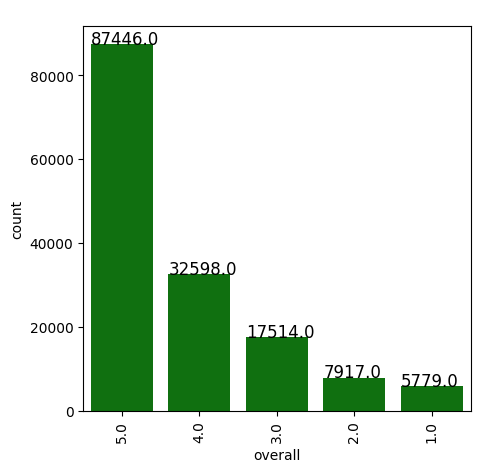

In [ ]:
categroy_distribution(df, 'overall')

		Distribution of Overall_Rating


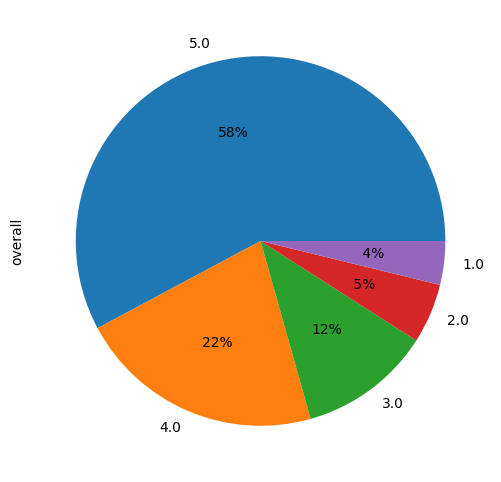

In [ ]:
print("\t\tDistribution of Overall_Rating")
plt.figure(figsize=(7,6))
df['overall'].value_counts().plot(kind='pie', autopct='%2.0f%%')
plt.show()

In [ ]:
# Lets do a scatter plot showing the relationship between overall rating and helpful votes.
fig1 = px.scatter(df, x='helpful', y='overall', title='Overall Rating vs. Helpful Votes')
fig1.show()

### Text Pre-Processing

In [ ]:
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
# Normalize the text
df['reviewText'] = df['reviewText'].apply(lambda s: s.lower())

In [ ]:
# Text preprocessing
stop_words = set(stopwords.words('english'))

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove links
    text = re.sub(r"http\S+", "", text)
    # Remove special characters and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # Remove punctuations in string
    text = re.sub(r'[^\w\s]', "", text)
    return text


In [ ]:
# Apply the preprocess_text function to the 'reviewText' column
df['reviewText'] = df['reviewText'].apply(preprocess_text)

# Print the DataFrame with preprocessed text
print(df.head())

       reviewerID        asin     reviewerName helpful  \
0  A1VEELTKS8NLZB  616719923X  Amazon Customer  [0, 0]   
1  A14R9XMZVJ6INB  616719923X          amf0001  [0, 1]   
2  A27IQHDZFQFNGG  616719923X          Caitlin  [3, 4]   
3  A31QY5TASILE89  616719923X     DebraDownSth  [0, 0]   
4  A2LWK003FFMCI5  616719923X         Diana X.  [1, 2]   

                                          reviewText  overall  \
0  just another flavor of kit kat but the taste i...      4.0   
1  i bought this on impulse and it comes from jap...      3.0   
2  really good great gift for any fan of green te...      4.0   
3  i had never had it before was curious to see w...      5.0   
4  i ve been looking forward to trying these afte...      4.0   

                                             summary  unixReviewTime  \
0                                         Good Taste      1370044800   
1  3.5 stars,  sadly not as wonderful as I had hoped      1400457600   
2                                           

In [ ]:
# Tokenization and stopword removal
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and convert to lowercase
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords
    return filtered_tokens

In [ ]:
documents = df['reviewText'].values.tolist()

In [ ]:
processed_documents = [preprocess_text(doc) for doc in documents]


In [ ]:
# define a function for getting all words from the text
def returning_tokinize_list(df,column_name):
    df = df.reset_index(drop=True)
    tokenize_list = [word_tokenize(df[column_name][i]) for i in range(df.shape[0])]
    final = [j for i in tokenize_list for j in i]
    return final

In [ ]:
# get the all words of text into list
tokenize_list_words= returning_tokinize_list(df, 'reviewText')

In [ ]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return tabulate(df_, headers = 'keys', tablefmt = 'psql')

# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordCloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

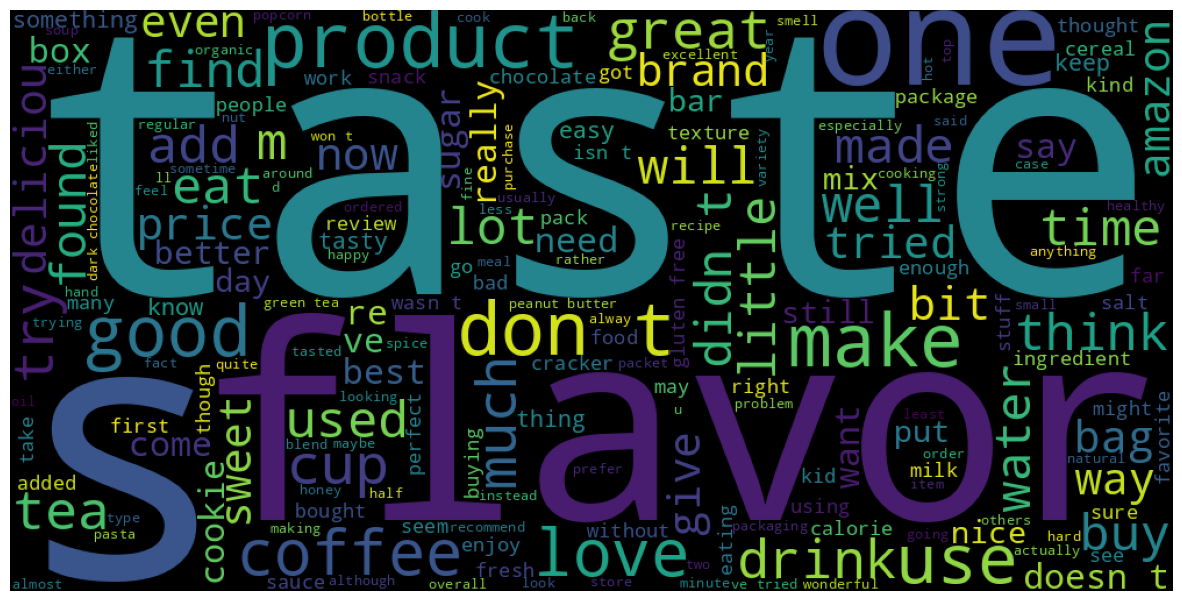

In [ ]:
# draw word cloud
word_cloud(tokenize_list_words)

# lets try to check the 15 most common words
MCW = most_common_words(tokenize_list_words, common_words=15)

In [ ]:
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_documents)
corpus = [dictionary.doc2bow(doc) for doc in processed_documents]

# LDA model
num_topics = 10  # Specify the number of topics
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.013*"sauce" + 0.013*"use" + 0.012*"make" + 0.012*"add" + 0.011*"salt" + 0.011*"pasta" + 0.011*"rice" + 0.011*"tuna" + 0.010*"seasoning" + 0.010*"flavor"')
(1, '0.095*"coffee" + 0.043*"cup" + 0.023*"k" + 0.019*"cups" + 0.015*"like" + 0.015*"flavor" + 0.014*"roast" + 0.011*"good" + 0.011*"keurig" + 0.010*"strong"')
(2, '0.034*"like" + 0.027*"taste" + 0.022*"would" + 0.021*"flavor" + 0.018*"good" + 0.017*"popcorn" + 0.015*"really" + 0.012*"one" + 0.011*"much" + 0.010*"think"')
(3, '0.084*"chocolate" + 0.041*"butter" + 0.037*"cookies" + 0.028*"caramel" + 0.020*"milk" + 0.020*"peanut" + 0.018*"cookie" + 0.017*"dark" + 0.012*"bar" + 0.012*"cocoa"')
(4, '0.021*"price" + 0.013*"product" + 0.012*"amazon" + 0.012*"good" + 0.012*"great" + 0.011*"bag" + 0.010*"store" + 0.010*"buy" + 0.009*"box" + 0.009*"get"')
(5, '0.038*"sugar" + 0.026*"fruit" + 0.023*"sweet" + 0.019*"like" + 0.017*"oatmeal" + 0.017*"flavor" + 0.015*"cinnamon" + 0.015*"taste" + 0.015*"bars" + 0.015*"apple"')
(6, '0.032*"ca

(0, '0.079*"coffee" + 0.057*"tea" + 0.029*"cup" + 0.018*"like" + 0.018*"flavor" + 0.011*"roast" + 0.011*"good" + 0.010*"strong" + 0.010*"one" + 0.010*"taste"')
(1, '0.012*"one" + 0.011*"product" + 0.007*"box" + 0.007*"first" + 0.006*"would" + 0.006*"bag" + 0.006*"review" + 0.006*"get" + 0.006*"plastic" + 0.006*"time"')
(2, '0.022*"sugar" + 0.021*"calories" + 0.019*"fat" + 0.015*"serving" + 0.015*"ingredients" + 0.015*"organic" + 0.014*"per" + 0.012*"protein" + 0.011*"fiber" + 0.010*"corn"')
(3, '0.024*"snack" + 0.015*"eat" + 0.015*"great" + 0.014*"good" + 0.014*"sweet" + 0.014*"like" + 0.013*"bars" + 0.012*"bag" + 0.012*"bar" + 0.012*"love"')
(4, '0.028*"price" + 0.021*"great" + 0.019*"good" + 0.016*"buy" + 0.013*"amazon" + 0.013*"store" + 0.012*"love" + 0.012*"product" + 0.011*"brand" + 0.010*"get"')
(5, '0.072*"chocolate" + 0.033*"butter" + 0.032*"cookies" + 0.021*"gluten" + 0.020*"free" + 0.018*"caramel" + 0.017*"milk" + 0.017*"peanut" + 0.015*"cookie" + 0.015*"dark"')
(6, '0.038*"salt" + 0.031*"tuna" + 0.026*"flavor" + 0.022*"sauce" + 0.020*"hot" + 0.017*"seasoning" + 0.016*"spicy" + 0.014*"oil" + 0.011*"salad" + 0.011*"dressing"')
(7, '0.031*"water" + 0.022*"drink" + 0.020*"taste" + 0.020*"like" + 0.020*"sugar" + 0.019*"flavor" + 0.015*"sweet" + 0.011*"bottle" + 0.010*"energy" + 0.009*"honey"')
(8, '0.017*"use" + 0.014*"add" + 0.014*"make" + 0.014*"oil" + 0.013*"pasta" + 0.012*"rice" + 0.011*"easy" + 0.010*"coconut" + 0.009*"water" + 0.009*"great"')
(9, '0.037*"like" + 0.027*"taste" + 0.025*"would" + 0.021*"good" + 0.021*"flavor" + 0.018*"popcorn" + 0.017*"really" + 0.012*"much" + 0.012*"one" + 0.010*"think"')

In [ ]:
# Compute coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.5116773262837373


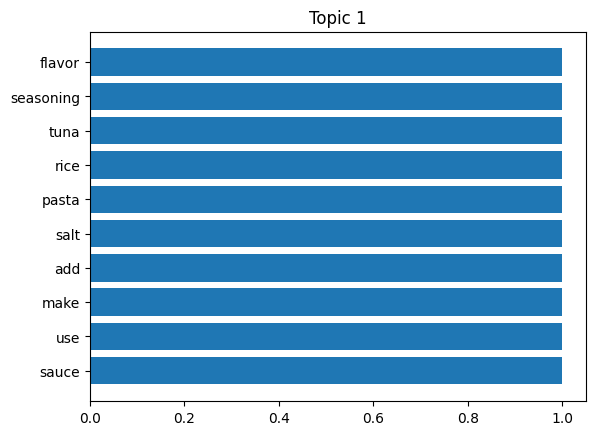

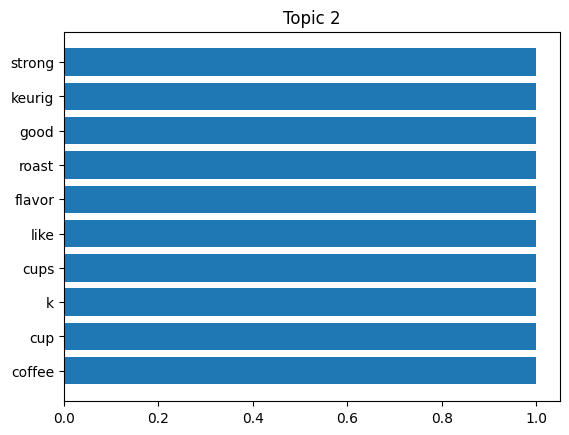

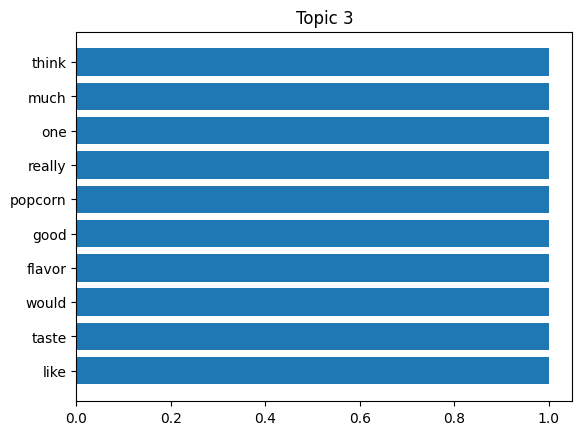

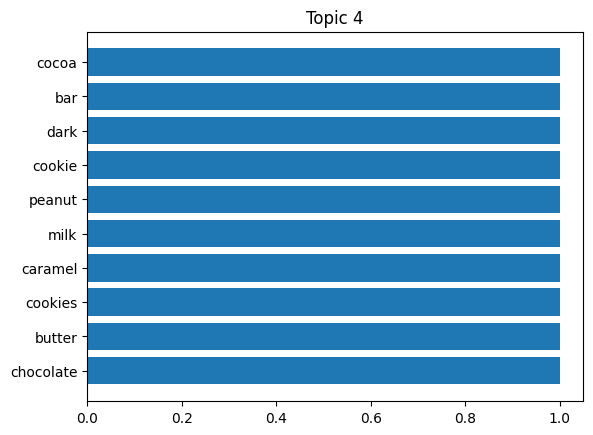

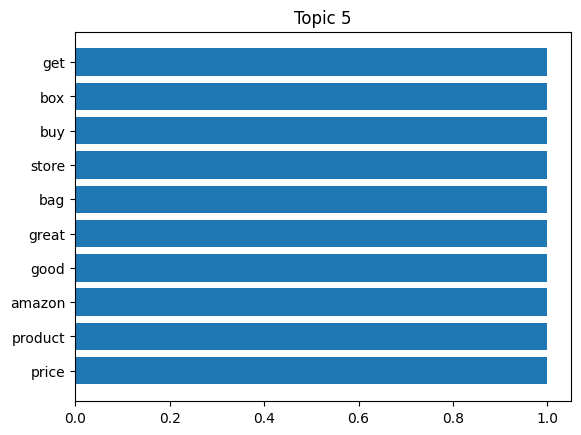

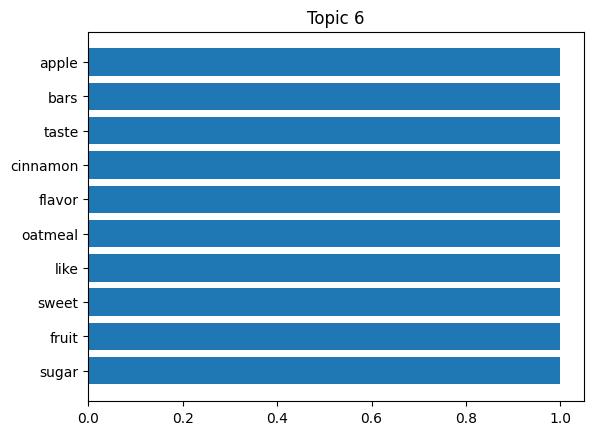

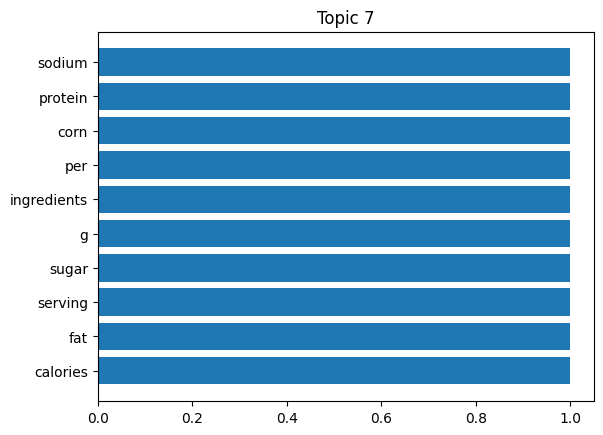

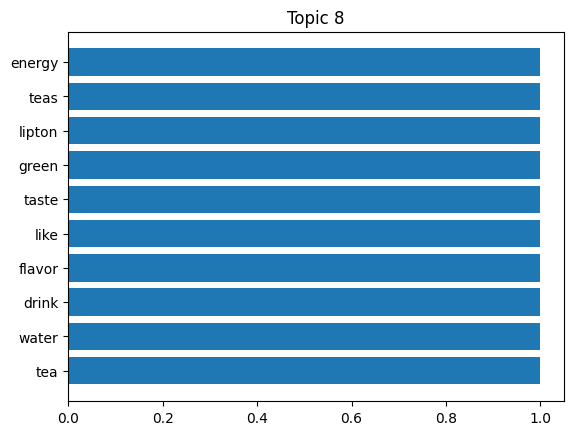

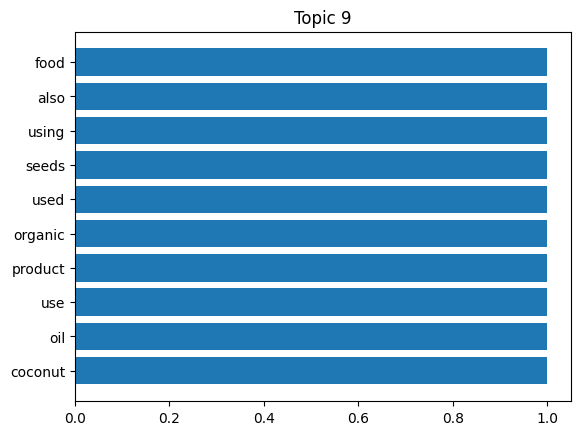

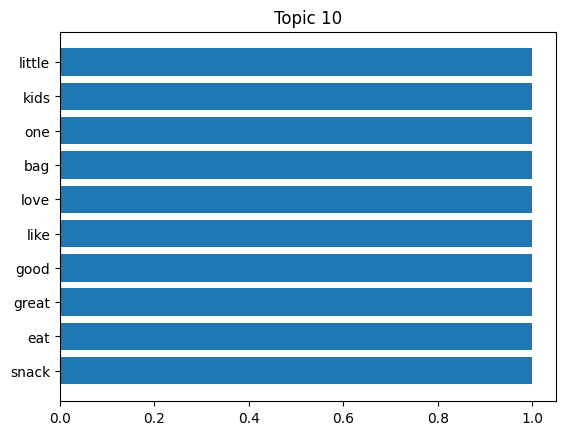

In [ ]:
# Plotting topics
topics = lda_model.show_topics(formatted=False)
for topic_num, topic_words in topics:
    topic_words = [word for word, _ in topic_words]
    plt.figure()
    plt.title(f"Topic {topic_num + 1}")
    plt.barh(range(len(topic_words)), [1] * len(topic_words), tick_label=topic_words)
    plt.show()

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Perform sentiment analysis using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
df['sentiment'] = df['reviewText'].apply(lambda s: vader.polarity_scores(s)['compound'])

In [ ]:
# Perform sentiment analysis using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
df['sentiment'] = df['reviewText'].apply(lambda s: vader.polarity_scores(s)['compound'])

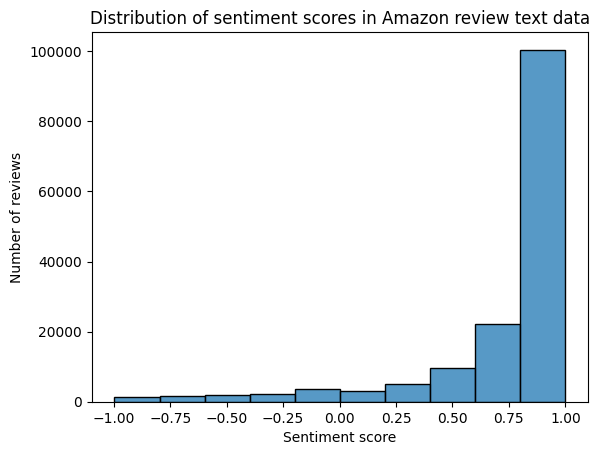

In [ ]:
# Visualize the distribution of sentiment scores
sns.histplot(df['sentiment'], bins=10)
plt.xlabel('Sentiment score')
plt.ylabel('Number of reviews')
plt.title('Distribution of sentiment scores in Amazon review text data')
plt.show()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

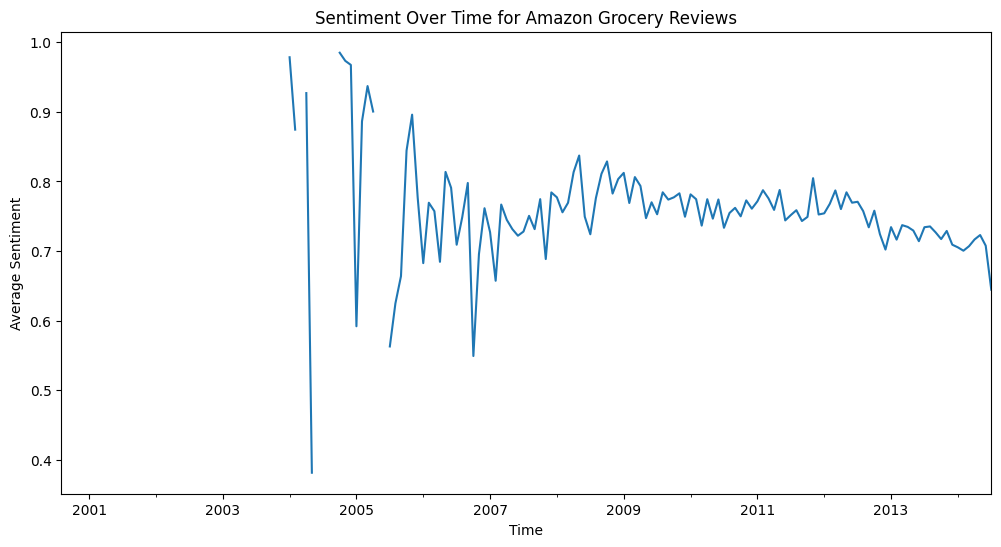

In [ ]:
# Function to calculate sentiment scores using VADER
def calculate_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to each review and add a new 'sentiment' column
df['sentiment'] = df['reviewText'].apply(calculate_sentiment)

# Convert the 'unixReviewTime' column to a datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'], unit='s')

# Group the data by reviewTime and calculate the mean sentiment for each time period
sentiment_over_time = df.groupby(pd.Grouper(key='reviewTime', freq='M'))['sentiment'].mean()

# Plot the sentiment over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(title='Sentiment Over Time for Amazon Grocery Reviews')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.show()

In [ ]:
average_sentiment_by_rating = df.groupby('overall')['sentiment'].mean()

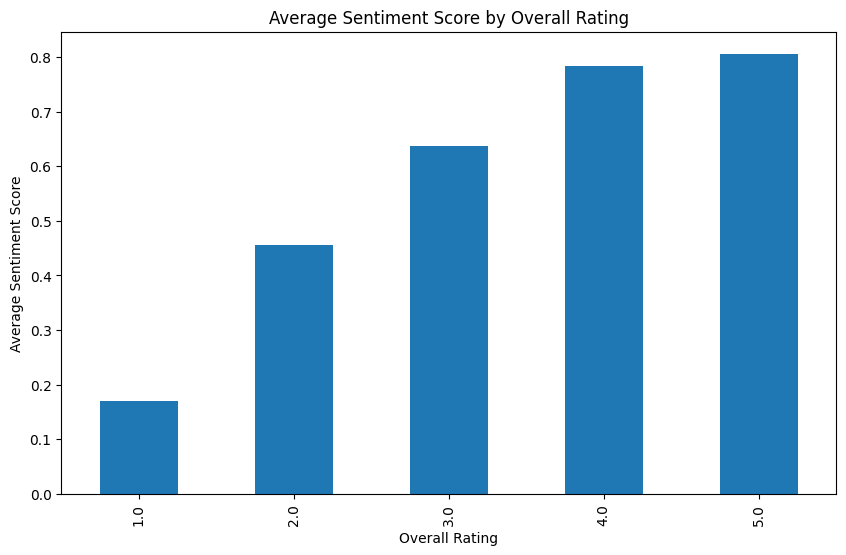

In [ ]:
# Create a bar plot to visualize the relationship between ratings and sentiment
plt.figure(figsize=(10, 6))
average_sentiment_by_rating.plot(kind='bar')
plt.title('Average Sentiment Score by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Average Sentiment Score')
plt.show()

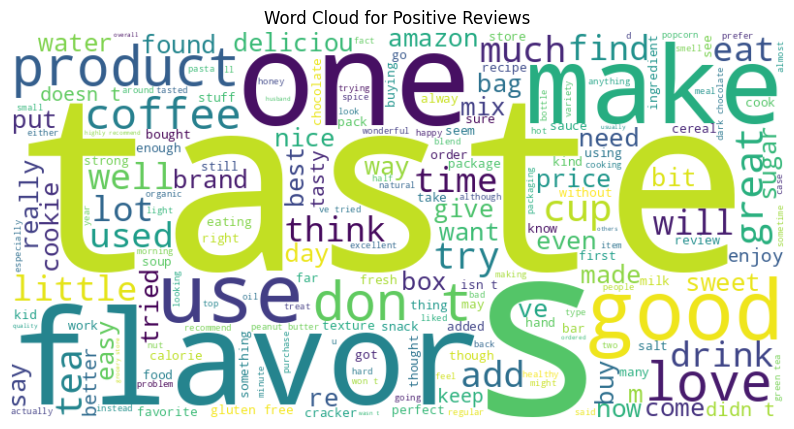

In [ ]:
# Filter positive reviews (adjust this based on your dataset)
positive_reviews = df[df['overall'] >= 4]['reviewText']

# Join the positive reviews into a single text
positive_text = ' '.join(positive_reviews)

# Generate a word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud for positive reviews
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

Model **Training**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Tokenize the text data
max_words = 10000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['reviewText'])
X = tokenizer.texts_to_sequences(df['reviewText'])
X = pad_sequences(X)

# Define the target variable (positive or negative sentiment)
y = (df['overall'] >= 4).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=X.shape[1]))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
1891/1891 [==============================] - 5222s 3s/step - loss: 0.3028 - accuracy: 0.8739 - val_loss: 0.2561 - val_accuracy: 0.8964
Epoch 2/5
 359/1891 [====>.........................] - ETA: 1:06:03 - loss: 0.2141 - accuracy: 0.9157